
# Finding the best fitting variogram model


In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.spatial import distance_matrix

import gstools as gs

In [2]:
import os 
import sys
sys.path.insert(0, '/Users/ajolaise/Library/CloudStorage/OneDrive-NTNU/PhD/code/CASCADE/src')
from Sinmod import Sinmod
from Cascade import Cascade
from Covariance import Covariance
from plotting.SinmodPlotting import SinmodPlotting

In [5]:
sinmod_path = "/Users/ajolaise/Library/CloudStorage/OneDrive-NTNU/PhD/code/CASCADE/data/sinmod/"
files = ["BioStates_froshelf.nc", "BioStates_midnor.nc"]
plot_test_path = "/Users/ajolaise/Library/CloudStorage/OneDrive-NTNU/PhD/code/CASCADE/figures/tests/Sinmod/"

file_ind = 0
logging_kwargs = {
    "print_to_console": True,
    "log_file": plot_test_path + "Sinmod_notebook_log.txt",
    "overwrite_file": True
}
boundary_kwargs = {
    "border_file": "/border_files/cascade_test_xy.csv",
    "file_type": "xy"}

sinmod_c = Sinmod(sinmod_path + "/" + files[file_ind ], 
                        plot_path=plot_test_path,
                        log_kwargs=logging_kwargs,
                        boundary_kwargs=boundary_kwargs,
                      print_while_running=True)

2025-05-13 20:29:06    [INFO] [Sinmod] Setting up Sinmod class
2025-05-13 20:29:06    [INFO] [Sinmod] Setting up boundary
2025-05-13 20:29:06    [INFO] [Sinmod] Boundary kwargs: {'border_file': '/border_files/cascade_test_xy.csv', 'file_type': 'xy'}
2025-05-13 20:29:06    [INFO] [Sinmod] Reading file /Users/ajolaise/Library/CloudStorage/OneDrive-NTNU/PhD/code/CASCADE/data/sinmod//BioStates_froshelf.nc
<class 'netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.5
    title: Current data from SINMOD
    institution: SINTEF Ocean
    grid_mapping: grid_mapping
    grid_mapping_name: polar_stereographic
    straight_vertical_longitude_from_pole: 58.0
    horizontal_resolution: 160.0
    coordinate_north_pole: [13471.  11643.5]
    latitude_of_projection_origin: 90.0
    standard_parallel: 60.0
    barotropic_timestep: 1.3636363636363635
    baroclinic_timestep: 30.0
    _FillValue: -32768
    setup: FroShelf
    relax_e: T
    nested: T
    tidal_inpu

In [6]:
Sx = sinmod_c.sinmod_data["flatten"]["xc"]
Sy = sinmod_c.sinmod_data["flatten"]["yc"]
calanus = sinmod_c.sinmod_data["flatten"]["calanus_finmarchicus"]
ocean_inds = sinmod_c.sinmod_data["flatten"]["ocean_inds"]
valid_inds = sinmod_c.sinmod_data["flatten"]["valid_points"]
Sx = Sx[valid_inds]
Sy = Sy[valid_inds]
calanus = calanus[:, valid_inds]
print("calanus shape", calanus.shape)


n = 2000
random_inds = np.random.choice(len(Sx), size=n, replace=False)
Sx_rnd = Sx[random_inds]
Sy_rnd = Sy[random_inds]
calanus_rnd = calanus[1, random_inds]
log_calanus_rnd = np.log(calanus_rnd + 0.0001)
S_rnd = np.vstack((Sx_rnd, Sy_rnd)).T
dist = distance_matrix(S_rnd, S_rnd)
diff = np.abs(calanus_rnd[:, None] - calanus_rnd[None, :])
log_diff = np.abs(np.log(calanus_rnd[:, None]+0.0001) - np.log(calanus_rnd[None, :]+0.0001))
d = 15000
short_dist = dist[dist < d]
short_diff = diff[dist < d]


max_x = 30000
bins = np.linspace(0, max_x, 50)
bin_center, gamma = gs.vario_estimate((Sx_rnd, Sy_rnd), calanus_rnd, bins)
models = {
    "Gaussian": gs.Gaussian,
    "Exponential": gs.Exponential,
    "Matern": gs.Matern
}
scores = {}

calanus shape (3, 34708)


calanus shape (3, 34708)
Model: Gaussian, Parameters: {'var': 7.740086773313689, 'len_scale': 5625.570973118278, 'nugget': 2.3404169204720566}, R2: 0.9829380939771661
Model: Exponential, Parameters: {'var': 10.465657746592484, 'len_scale': 5179.909066027227, 'nugget': 0.0025857848649257545}, R2: 0.9879432629356852
Model: Matern, Parameters: {'var': 9.024593185457755, 'len_scale': 3415.3825052754146, 'nugget': 1.248632235098245, 'nu': 1.083242741487488}, R2: 0.9919827415426073
Model: Stable, Parameters: {'var': 9.05812022568732, 'len_scale': 5710.0737416641505, 'nugget': 1.1579374152969641, 'alpha': 1.3639604661650333}, R2: 0.9934653850569108
Model: Rational, Parameters: {'var': 8.422239006712632, 'len_scale': 5328.461063307667, 'nugget': 1.8664482729035718, 'alpha': 2.0584862845498786}, R2: 0.9880330509913049
Model: Circular, Parameters: {'var': 8.680869682951474, 'len_scale': 11886.21253023278, 'nugget': 1.3987122110184795}, R2: 0.9922199583883629
Model: Spherical, Parameters: {'var':

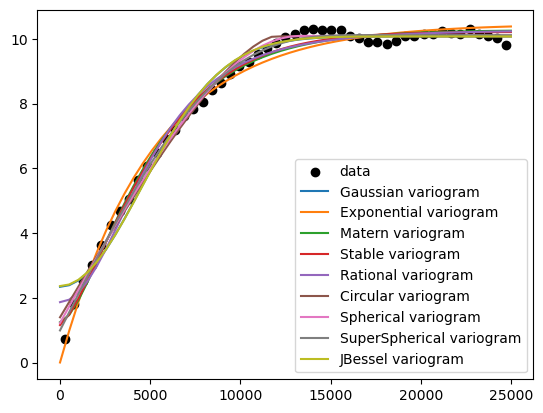

Model: Gaussian, Parameters: {'var': 8.600851196823388, 'len_scale': 6644.716047350821, 'nugget': 2.0905037689406125}, R2: 0.9700083735675589
Model: Exponential, Parameters: {'var': 11.332092477928812, 'len_scale': 6665.528694492157, 'nugget': 2.743253406866142e-17}, R2: 0.9533772368720144
Model: Matern, Parameters: {'var': 8.600900581724314, 'len_scale': 3748.786519823369, 'nugget': 2.090407772559314, 'nu': 21.854139774464034}, R2: 0.9700086131239647
Model: Stable, Parameters: {'var': 9.149921078514819, 'len_scale': 7169.1759967282405, 'nugget': 1.5858346267745307, 'alpha': 1.7036942107223068}, R2: 0.9720755717839542
Model: Rational, Parameters: {'var': 8.629949341777618, 'len_scale': 7434.262353553154, 'nugget': 2.066249542152545, 'alpha': 49.99999999999999}, R2: 0.9698876108428754
Model: Circular, Parameters: {'var': 9.676389873645332, 'len_scale': 14001.72477063696, 'nugget': 1.023051465619574}, R2: 0.9842572905069594
Model: Spherical, Parameters: {'var': 9.875266369313033, 'len_sc

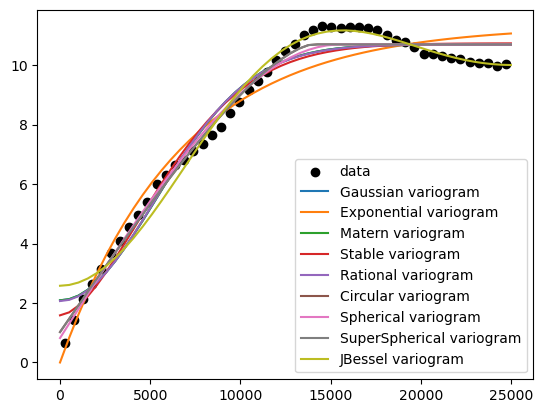

Model: Gaussian, Parameters: {'var': 8.433174991096713, 'len_scale': 6160.654882537891, 'nugget': 1.994532032973119}, R2: 0.976898699846515
Model: Exponential, Parameters: {'var': 11.005342835932199, 'len_scale': 6112.151819421458, 'nugget': 1.0863728183193295e-14}, R2: 0.9647155597958312
Model: Matern, Parameters: {'var': 8.942907787922234, 'len_scale': 3570.99357119797, 'nugget': 1.5698541946942652, 'nu': 2.9946614684923696}, R2: 0.9783138011726102
Model: Stable, Parameters: {'var': 9.221005987474546, 'len_scale': 6543.581588442061, 'nugget': 1.2821387690930022, 'alpha': 1.5980634959292708}, R2: 0.9810536260342013
Model: Rational, Parameters: {'var': 8.53450582253699, 'len_scale': 6761.995963837936, 'nugget': 1.9113537263492355, 'alpha': 15.145007696840345}, R2: 0.9772252915741018
Model: Circular, Parameters: {'var': 9.445495078406642, 'len_scale': 13052.245298362022, 'nugget': 0.9870993507851544}, R2: 0.986728809175511
Model: Spherical, Parameters: {'var': 9.65115444431882, 'len_sca

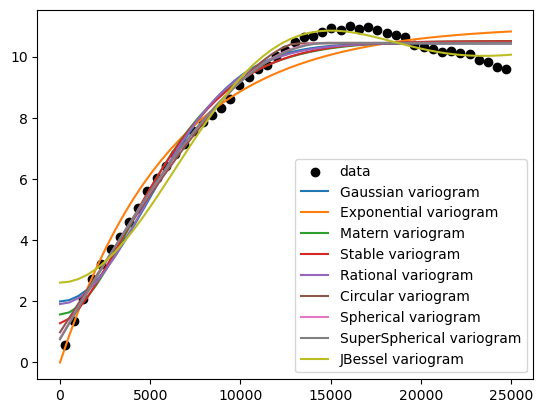

In [8]:
Sx = sinmod_c.sinmod_data["flatten"]["xc"]
Sy = sinmod_c.sinmod_data["flatten"]["yc"]
calanus = sinmod_c.sinmod_data["flatten"]["calanus_finmarchicus"]
ocean_inds = sinmod_c.sinmod_data["flatten"]["ocean_inds"]
valid_inds = sinmod_c.sinmod_data["flatten"]["valid_points"]
Sx = Sx[valid_inds]
Sy = Sy[valid_inds]
calanus = calanus[:, valid_inds]
print("calanus shape", calanus.shape)

models = {
    "Gaussian": gs.Gaussian,
    "Exponential": gs.Exponential,
    "Matern": gs.Matern,
    "Stable": gs.Stable,
    "Rational": gs.Rational,
    "Circular": gs.Circular,
    "Spherical": gs.Spherical,
    "SuperSpherical": gs.SuperSpherical,
    "JBessel": gs.JBessel,
}

n = 3000
max_x = 25000
for i in range(3): 



    
    random_inds = np.random.choice(len(Sx), size=n, replace=False)
    Sx_rnd = Sx[random_inds]
    Sy_rnd = Sy[random_inds]
    calanus_rnd = calanus[i, random_inds]
    log_calanus_rnd = np.log(calanus_rnd + 0.0001)
    S_rnd = np.vstack((Sx_rnd, Sy_rnd)).T
    dist = distance_matrix(S_rnd, S_rnd)
    diff = np.abs(calanus_rnd[:, None] - calanus_rnd[None, :])
    log_diff = np.abs(np.log(calanus_rnd[:, None]+0.0001) - np.log(calanus_rnd[None, :]+0.0001))
    d = 15000
    short_dist = dist[dist < d]
    short_diff = diff[dist < d]

    
    bins = np.linspace(0, max_x, 50)
    bin_center, gamma = gs.vario_estimate((Sx_rnd, Sy_rnd), log_calanus_rnd, bins)
    # plot the estimated variogram
    plt.scatter(bin_center, gamma, color="k", label="data")
    ax = plt.gca()

    # fit all models to the estimated variogram
    for model in models:
        fit_model = models[model](dim=2)
        para, pcov, r2 = fit_model.fit_variogram(bin_center, gamma, return_r2=True)
        print(f"Model: {model}, Parameters: {para}, R2: {r2}")

        fit_model.plot(x_max=max_x, ax=ax)
        scores[model] = r2


        ranking = sorted(scores.items(), key=lambda item: item[1], reverse=True)
    print("RANKING by Pseudo-r2 score")
    for i, (model, score) in enumerate(ranking, 1):
        print(f"{i:>6}. {model:>15}: {score:.5}")

    plt.show()

Generate a synthetic field with an exponential model.



Estimate the variogram of the field with 40 bins and plot the result.



In [9]:
max_x = 30000
bins = np.linspace(0, max_x, 50)
bin_center, gamma = gs.vario_estimate((Sx_rnd, Sy_rnd), log_calanus_rnd, bins)

Define a set of models to test.



In [10]:
models = {
    "Gaussian": gs.Gaussian,
    "Exponential": gs.Exponential,
    "Matern": gs.Matern
}
scores = {}

Iterate over all models, fit their variogram and calculate the r2 score.



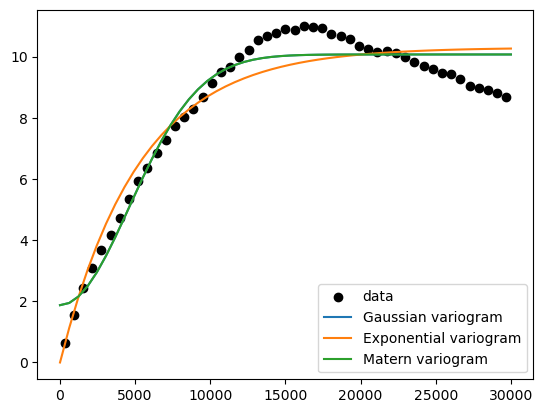

In [11]:
# plot the estimated variogram
plt.scatter(bin_center, gamma, color="k", label="data")
ax = plt.gca()

# fit all models to the estimated variogram
for model in models:
    fit_model = models[model](dim=2)
    para, pcov, r2 = fit_model.fit_variogram(bin_center, gamma, return_r2=True)
    fit_model.plot(x_max=max_x, ax=ax)
    scores[model] = r2

Create a ranking based on the score and determine the best models



In [13]:
ranking = sorted(scores.items(), key=lambda item: item[1], reverse=True)
print("RANKING by Pseudo-r2 score")
for i, (model, score) in enumerate(ranking, 1):
    print(f"{i:>6}. {model:>15}: {score:.5}")

plt.show()

RANKING by Pseudo-r2 score
     1.        Gaussian: 0.9456
     2.          Matern: 0.9456
     3.     Exponential: 0.91793


2025-05-14 11:24:58    [INFO] [Covariance] Covariance model initialized


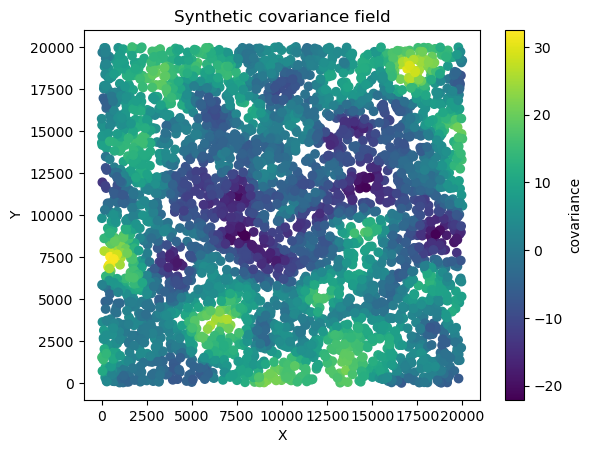

In [52]:
# Generate some synthetic data

logger_kwargs = {
        "print_to_console": True,
        "overwrite_file": True,
    }

covariance_params = {
        "phi_xy": 1.0,
        "phi_temporal": 1.0,
        "sigma": 1.0,
        "temporal_covariance_type": "matern_3_2",
        "xy_covariance_type": "matern_3_2",
    }
cov = Covariance(covariance_params, logger_kwargs=logger_kwargs)



n = 4000
Sx = np.random.uniform(0, 20000, n)
Sy = np.random.uniform(0, 20000, n)
S = np.vstack((Sx, Sy)).T

sigma = 10
phi = 2000

dist = distance_matrix(S, S)
Sigma = cov.matern_3_2(dist, params={"phi": phi}) * sigma**2
mean = np.zeros(n)
y = np.random.multivariate_normal(mean, Sigma) 


plt.scatter(S[:, 0], S[:, 1], c=y, cmap="viridis")
plt.colorbar(label="covariance")
plt.title("Synthetic covariance field")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()



In [28]:
np.sqrt(63.04536078796363)

7.940110880079927

Model: Gaussian, Parameters: {'var': 72.90133955738544, 'len_scale': 3576.0736247021596, 'nugget': 22.472517875599923}, R2: 0.9369525462442051
Model: Exponential, Parameters: {'var': 107.6427404728063, 'len_scale': 3857.867189982708, 'nugget': 7.877455724858358e-18}, R2: 0.9906841804862442
Model: Matern, Parameters: {'var': 106.62677081059128, 'len_scale': 2638.771713076364, 'nugget': 3.7787802615774435e-15, 'nu': 0.5218909498204106}, R2: 0.9910341833962136
Model: Stable, Parameters: {'var': 108.66523835997711, 'len_scale': 3930.6965993226854, 'nugget': 2.484604239041777e-15, 'alpha': 0.9822438956331137}, R2: 0.9904620484073494
Model: Rational, Parameters: {'var': 113.22689138491513, 'len_scale': 2263.626319685802, 'nugget': 2.2999069140686084, 'alpha': 0.5000000000000001}, R2: 0.9911523865266354


/Users/ajolaise/opt/anaconda3/envs/cascade/lib/python3.9/site-packages/gstools/covmodel/plot.py:122: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


Model: Circular, Parameters: {'var': 79.44396597928134, 'len_scale': 7850.15613890838, 'nugget': 16.076342327803058}, R2: 0.9510049797127081
Model: Spherical, Parameters: {'var': 82.4877259535434, 'len_scale': 8824.409941524676, 'nugget': 13.67512806861713}, R2: 0.9603949250522231
Model: SuperSpherical, Parameters: {'var': 95.41867825602267, 'len_scale': 38483.27868110038, 'nugget': 1.98673654029991, 'nu': 49.999999992684174}, R2: 0.9821959907270186
Model: JBessel, Parameters: {'var': 72.38673223648648, 'len_scale': 286.59458925556874, 'nugget': 22.957518084235616, 'nu': 49.99999999999999}, R2: 0.9346013339971616
RANKING by Pseudo-r2 score
     1.        Rational: 0.99115
     2.          Matern: 0.99103
     3.     Exponential: 0.99068
     4.          Stable: 0.99046
     5.  SuperSpherical: 0.9822
     6.       Spherical: 0.96039
     7.        Circular: 0.951
     8.        Gaussian: 0.93695
     9.         JBessel: 0.9346


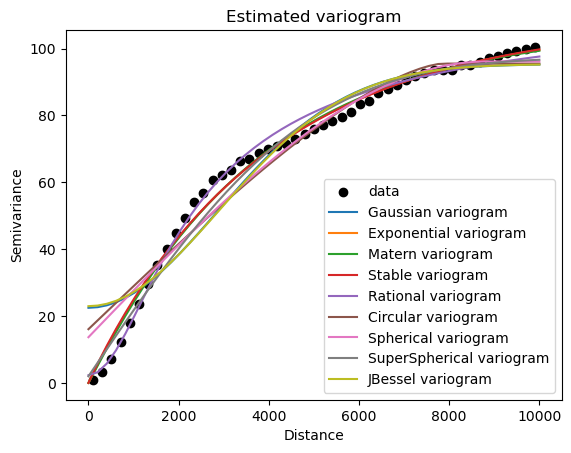

In [53]:
# Estimate the variogram
bins = np.linspace(0, 10000, 50)

bin_center, gamma = gs.vario_estimate((Sx, Sy), y, bins)

# plot the estimated variogram

models = {
    "Gaussian": gs.Gaussian,
    "Exponential": gs.Exponential,
    "Matern": gs.Matern,
    "Stable": gs.Stable,
    "Rational": gs.Rational,
    "Circular": gs.Circular,
    "Spherical": gs.Spherical,
    "SuperSpherical": gs.SuperSpherical,
    "JBessel": gs.JBessel,
}

scores = {}
# plot the estimated variogram
plt.scatter(bin_center, gamma, color="k", label="data")
ax = plt.gca()
# fit all models to the estimated variogram
for model in models:
    fit_model = models[model](dim=2)
    para, pcov, r2 = fit_model.fit_variogram(bin_center, gamma, return_r2=True)
    print(f"Model: {model}, Parameters: {para}, R2: {r2}")

    fit_model.plot(x_max=10000, ax=ax)
    scores[model] = r2
ranking = sorted(scores.items(), key=lambda item: item[1], reverse=True)
print("RANKING by Pseudo-r2 score")
for i, (model, score) in enumerate(ranking, 1):
    print(f"{i:>6}. {model:>15}: {score:.5}")
plt.title("Estimated variogram")
plt.xlabel("Distance")
plt.ylabel("Semivariance")
plt.legend()
plt.show()



Estimated parameters:
  sigma² = 1.857, rho = 22.347, nu = 0.924, tau = 0.000


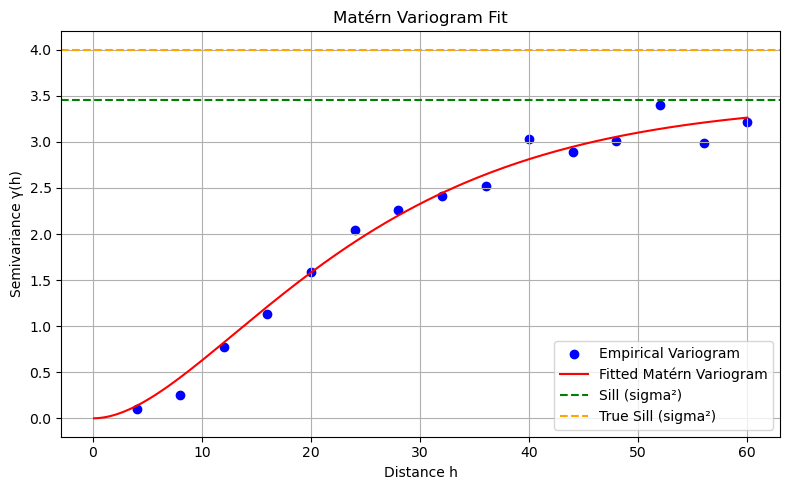

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import kv, gamma
from skgstat import Variogram

# 1. Generate synthetic spatial data
np.random.seed(0)
n = 500
coords = np.random.rand(n, 2) * 400  # 2D spatial coordinates

# Define true Matérn parameters
sigma_true = 2.0
rho_true = 20.0
nu_true = 3/2 # smoothness parameter, not estimated
tau_true = 0.1

def matern_covariance(h, sigma, rho, nu):
    h = np.maximum(h, 1e-10)  # avoid division by 0
    return (1 + np.sqrt(3) * h  / rho) * np.exp(-np.sqrt(3) * h / rho) * sigma**2

mater_cov = lambda h, rho, sigma: cov.matern_3_2(h, params={"phi": rho}) * sigma**2

# Compute the full covariance matrix
dist_matrix = np.linalg.norm(coords[:, None, :] - coords[None, :, :], axis=2)
cov_matrix = matern_covariance(dist_matrix, sigma_true, rho_true, nu_true)
cov_matrix += 1e-6 * np.eye(n)  # small noise for numerical stability

# Sample from the multivariate Gaussian field
z = np.random.multivariate_normal(mean=np.zeros(n), cov=cov_matrix)  + np.random.normal(0, tau_true, n)  # add some noise

# 2. Compute empirical variogram
V = Variogram(coords, z, model='matern', maxlag=60, n_lags=15, normalize=False)
empirical_distances = V.bins
empirical_gamma = V.experimental

# 3. Define theoretical Matérn variogram model: gamma(h) = sigma^2 - C(h)
def matern_variogram(h, sigma, rho, nu, tau):
    return sigma ** 2 - matern_covariance(h, sigma, rho, nu) + tau ** 2

# 4. Fit the Matérn variogram to the empirical data
initial_guess = [1.5, 10.0, 0.5, 1]  # sigma, rho, nu

popt, pcov = curve_fit(
    matern_variogram,
    empirical_distances,
    empirical_gamma,
    p0=initial_guess,
    bounds=([0.1, 0.1, 0., 0.], [10.0, 100.0, 5.0, 5.0])
)

sigma_est, rho_est, nu_est, tau_est = popt
print(f"Estimated parameters:\n  sigma² = {sigma_est:.3f}, rho = {rho_est:.3f}, nu = {nu_est:.3f}, tau = {tau_est:.3f}")

# 5. Plot empirical and fitted variogram
h_vals = np.linspace(0.1, max(empirical_distances), 200)
fitted_gamma = matern_variogram(h_vals, *popt)

plt.figure(figsize=(8, 5))
plt.scatter(empirical_distances, empirical_gamma, color='blue', label='Empirical Variogram')
plt.plot(h_vals, fitted_gamma, color='red', label='Fitted Matérn Variogram')
plt.axhline(y=sigma_est**2, color='green', linestyle='--', label='Sill (sigma²)')
plt.axhline(y=sigma_true**2, color='orange', linestyle='--', label='True Sill (sigma²)')
plt.xlabel('Distance h')
plt.ylabel('Semivariance γ(h)')
plt.title('Matérn Variogram Fit')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [59]:
import numpy as np
from scipy.spatial.distance import cdist
from scipy.optimize import minimize
from scipy.linalg import cholesky, solve
from scipy.special import kv, gamma

# 1. Simulate Data (Same as before)
np.random.seed(0)
n = 200
coords = np.random.rand(n, 2) * 100
sigma_true, rho_true, nu_true = 2.0, 20.0, 0.8

def matern_covariance(h, sigma, rho, nu):
    h = np.maximum(h, 1e-10)
    part1 = sigma**2 / (2**(nu - 1) * gamma(nu))
    part2 = (h / rho)**nu
    part3 = kv(nu, h / rho)
    return part1 * part2 * part3

# Covariance matrix
dist_matrix = cdist(coords, coords)
K_true = matern_covariance(dist_matrix, sigma_true, rho_true, nu_true)
z = np.random.multivariate_normal(np.zeros(n), K_true + 1e-6 * np.eye(n))

# 2. Define Negative Log-Likelihood
def negative_log_likelihood(params, coords, z):
    sigma, rho, nu = params
    if sigma <= 0 or rho <= 0 or nu <= 0:
        return np.inf
    h = cdist(coords, coords)
    K = matern_covariance(h, sigma, rho, nu) + 1e-6 * np.eye(len(z))
    
    try:
        L = cholesky(K, lower=True)
        alpha = solve(L.T, solve(L, z))
        log_det = 2 * np.sum(np.log(np.diag(L)))
        nll = 0.5 * (np.dot(z, alpha) + log_det + len(z) * np.log(2 * np.pi))
        return nll
    except np.linalg.LinAlgError:
        return np.inf

# 3. Optimize via MLE
initial_guess = [1.0, 10.0, 0.5]
bounds = [(1e-3, 10), (1e-3, 100), (0.1, 2.5)]

result = minimize(
    negative_log_likelihood,
    initial_guess,
    args=(coords, z),
    bounds=bounds,
    method='L-BFGS-B'
)

if result.success:
    sigma_est, rho_est, nu_est = result.x
    print(f"MLE estimates:\n  σ² = {sigma_est:.3f}, ρ = {rho_est:.3f}, ν = {nu_est:.3f}")
else:
    print("MLE optimization failed:", result.message)

MLE estimates:
  σ² = 1.399, ρ = 12.454, ν = 0.786


Estimated parameters:
  sigma² = 0.100, rho = 100.000, nu = 0.000, tau = 0.000


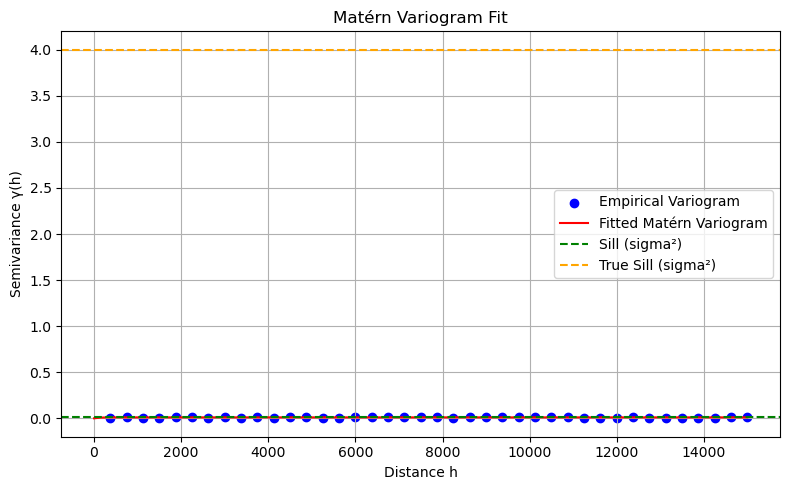

In [60]:

# 1. get data from Sinmod
random_inds = np.random.choice(len(Sx), size=n, replace=False)
Sx_rnd = Sx[random_inds]
Sy_rnd = Sy[random_inds]
calanus_rnd = calanus[0, random_inds]
log_calanus_rnd = np.log(calanus_rnd + 0.0001)
S_rnd = np.vstack((Sx_rnd, Sy_rnd)).T
dist = distance_matrix(S_rnd, S_rnd)
diff = np.abs(calanus_rnd[:, None] - calanus_rnd[None, :])
d = 15000
short_dist = dist[dist < d]
short_diff = diff[dist < d]





# Define true Matérn parameters
sigma_true = 2.0
rho_true = 20.0
nu_true = 3/2 # smoothness parameter, not estimated
tau_true = 0.1

def matern_covariance(h, sigma, rho, nu):
    h = np.maximum(h, 1e-10)  # avoid division by 0
    return (1 + np.sqrt(3) * h  / rho) * np.exp(-np.sqrt(3) * h / rho) * sigma**2

mater_cov = lambda h, rho, sigma: cov.matern_3_2(h, params={"phi": rho}) * sigma**2

# Compute the full covariance matrix
dist_matrix = np.linalg.norm(coords[:, None, :] - coords[None, :, :], axis=2)
cov_matrix = matern_covariance(dist_matrix, sigma_true, rho_true, nu_true)
cov_matrix += 1e-6 * np.eye(n)  # small noise for numerical stability


# 2. Compute empirical variogram
V = Variogram(S_rnd , calanus_rnd, model='matern', maxlag=d, n_lags=40, normalize=False)
empirical_distances = V.bins
empirical_gamma = V.experimental

# 3. Define theoretical Matérn variogram model: gamma(h) = sigma^2 - C(h)
def matern_variogram(h, sigma, rho, nu, tau):
    return sigma ** 2 - matern_covariance(h, sigma, rho, nu) + tau ** 2

# 4. Fit the Matérn variogram to the empirical data
initial_guess = [1.5, 10.0, 0.5, 1]  # sigma, rho, nu

popt, pcov = curve_fit(
    matern_variogram,
    empirical_distances,
    empirical_gamma,
    p0=initial_guess,
    bounds=([0.1, 0.1, 0., 0.], [10.0, 100.0, 5.0, 5.0])
)

sigma_est, rho_est, nu_est, tau_est = popt
print(f"Estimated parameters:\n  sigma² = {sigma_est:.3f}, rho = {rho_est:.3f}, nu = {nu_est:.3f}, tau = {tau_est:.3f}")

# 5. Plot empirical and fitted variogram
h_vals = np.linspace(0.1, max(empirical_distances), 200)
fitted_gamma = matern_variogram(h_vals, *popt)

plt.figure(figsize=(8, 5))
plt.scatter(empirical_distances, empirical_gamma, color='blue', label='Empirical Variogram')
plt.plot(h_vals, fitted_gamma, color='red', label='Fitted Matérn Variogram')
plt.axhline(y=sigma_est**2, color='green', linestyle='--', label='Sill (sigma²)')
plt.axhline(y=sigma_true**2, color='orange', linestyle='--', label='True Sill (sigma²)')
plt.xlabel('Distance h')
plt.ylabel('Semivariance γ(h)')
plt.title('Matérn Variogram Fit')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()